In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

To Load Data set Right click on the Stud.csv file and copy the path and paste it in read_csv

In [4]:
df=pd.read_csv(r'C:\Users\divak\OneDrive\Desktop\ml projects\notebook\data\Stud.csv')

In [19]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [32]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [38]:
col=[df.columns]
col

[Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course', 'math score', 'reading score',
        'writing score'],
       dtype='object')]

In [46]:
for i in df.columns:
    print(df[i].dtype)

object
object
object
object
object
int64
int64
int64


In [47]:
df.duplicated().sum()

np.int64(0)

In [48]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [49]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [55]:
print(df['gender'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['test preparation course'].unique())


['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['none' 'completed']


In [5]:
df['total']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total']/3

In [6]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


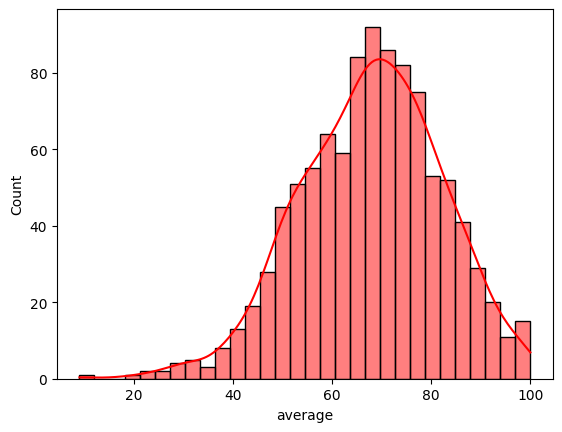

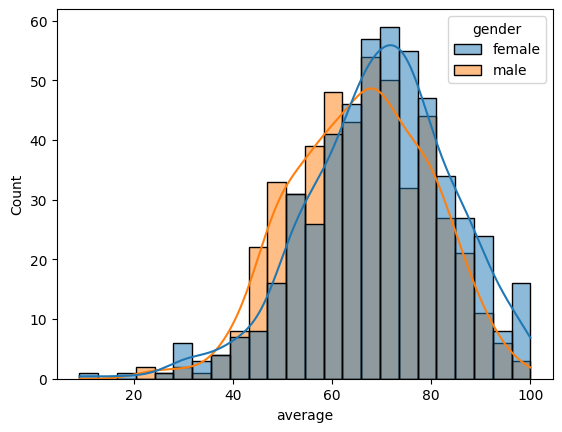

In [ ]:
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.show()
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

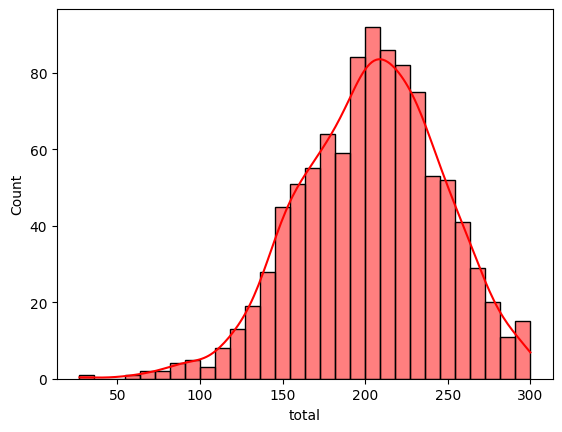

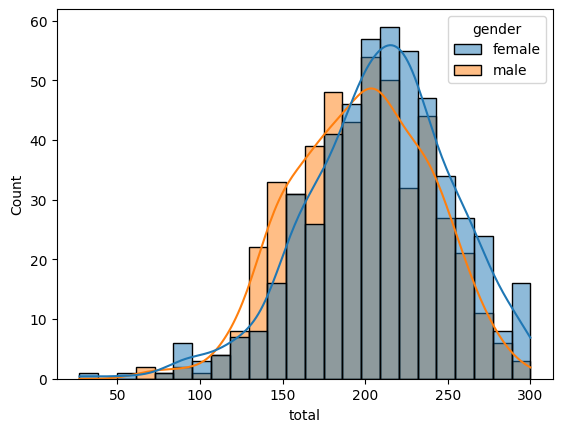

In [17]:
sns.histplot(data=df,x='total',bins=30,kde=True,color='r')
plt.show()
sns.histplot(data=df,x='total',kde=True,hue='gender')
plt.show()

In [19]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [24]:
X=df.drop('math score',axis=1)
y=df['math score']

In [25]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,71,65,195,65.000000
998,female,group D,some college,standard,completed,78,77,223,74.333333


In [23]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [29]:
num_fea=X.select_dtypes(exclude='object').columns
cat_fea=X.select_dtypes(include='object').columns
stand_scaler=StandardScaler()
one_hat_encode=OneHotEncoder()
scaler=ColumnTransformer([
    ('StandardScaler',stand_scaler,num_fea),
    ('OneHotEncoder',one_hat_encode,cat_fea)]
)

In [62]:
X_scaled=scaler.fit_transform(X)


In [63]:
X_scaled

array([[ 0.19399858,  0.39149181,  0.34357423, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.0219275 , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.74706375, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904, -0.19443008, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  0.46053169, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.06871048, ...,  0.        ,
         0.        ,  1.        ]], shape=(1000, 21))

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [65]:

X_train

array([[ 0.05694554,  0.45733301,  0.08626782, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.94779033,  0.98406266,  0.67105512, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.35894946,  1.18158627,  1.18566794, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.49126664, -0.99117351, -0.82600036, ...,  1.        ,
         0.        ,  1.        ],
       [-1.45063795, -0.99117351, -1.22365572, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.4960025 ,  1.37910989,  1.44297435, ...,  1.        ,
         0.        ,  1.        ]], shape=(800, 21))

In [66]:
X_train.shape

(800, 21)

In [43]:
def evaluate_model(true,pred):
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mse)
    r2=r2_score(true,pred)
    return mae,mse,rmse,r2

In [40]:
model={
    'linear regression': LinearRegression(),
    'lasso': Lasso(),
    'ridgo': Ridge(),
    'K Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'XGB Regressor': XGBRegressor(),
    'Cat Boost Regressor': CatBoostRegressor(),
    'SV Reg': SVR(),
}

In [68]:
for name, mdl in model.items():
    print(f"\nModel: {name}")
    
    # Fit the model
    mdl.fit(X_train, y_train)
    
    # Predict on training data
    y_train_pred = mdl.predict(X_train)
    
    # Predict on testing data
    y_test_pred = mdl.predict(X_test)
    
    # Evaluate
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Print results
    print("Training Evaluation:")
    print(f"MAE: {train_mae:.3f}, MSE: {train_mse:.3f}, RMSE: {train_rmse:.3f}, R2: {train_r2:.3f}")
    
    print("Testing Evaluation:")
    print(f"MAE: {test_mae:.3f}, MSE: {test_mse:.3f}, RMSE: {test_rmse:.3f}, R2: {test_r2:.3f}")



Model: linear regression
Training Evaluation:
MAE: 0.000, MSE: 0.000, RMSE: 0.000, R2: 1.000
Testing Evaluation:
MAE: 0.000, MSE: 0.000, RMSE: 0.000, R2: 1.000

Model: lasso
Training Evaluation:
MAE: 3.744, MSE: 22.449, RMSE: 4.738, R2: 0.900
Testing Evaluation:
MAE: 3.758, MSE: 22.251, RMSE: 4.717, R2: 0.909

Model: ridgo
Training Evaluation:
MAE: 0.272, MSE: 0.115, RMSE: 0.340, R2: 0.999
Testing Evaluation:
MAE: 0.268, MSE: 0.118, RMSE: 0.343, R2: 1.000

Model: K Neighbors Regressor
Training Evaluation:
MAE: 3.384, MSE: 18.311, RMSE: 4.279, R2: 0.919
Testing Evaluation:
MAE: 4.046, MSE: 26.820, RMSE: 5.179, R2: 0.890

Model: Decision Tree Regressor
Training Evaluation:
MAE: 0.000, MSE: 0.000, RMSE: 0.000, R2: 1.000
Testing Evaluation:
MAE: 2.950, MSE: 14.400, RMSE: 3.795, R2: 0.941

Model: Random Forest Regressor
Training Evaluation:
MAE: 0.847, MSE: 1.209, RMSE: 1.099, R2: 0.995
Testing Evaluation:
MAE: 2.143, MSE: 8.630, RMSE: 2.938, R2: 0.965

Model: AdaBoost Regressor
Training E

In [89]:
model1=Lasso()


In [90]:
model1.fit(X_train,y_train)

Lasso()

In [91]:
y_pred=model1.predict(X_test)

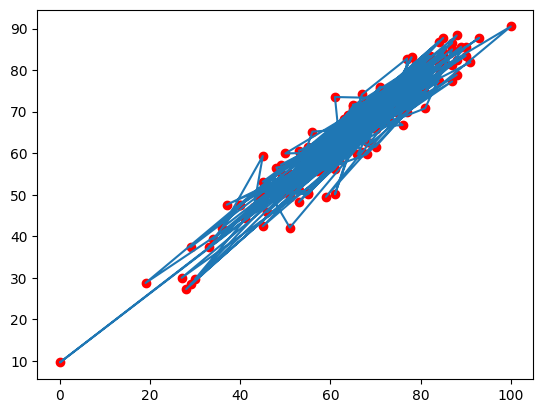

In [97]:
plt.scatter(y_test,y_pred,c='r')
plt.plot(y_test,y_pred)
plt.show()

In [94]:
s,r,t,e=evaluate_model(y_test,y_pred)
print(s,r,t,e)

3.7578722930396635 22.250777130286142 4.717072940954607 0.9085603540983004


In [95]:
pred_df=pd.DataFrame({'act':y_test,'pred':y_pred})

In [96]:
pred_df


,act,pred
521,91,81.874583
737,53,60.557075
740,80,75.132332
660,74,74.823382
411,84,81.311319
...,...,...
408,52,52.215442
332,62,58.449065
208,74,72.606101
613,65,67.971860
